<a href="https://colab.research.google.com/github/bsttiv/tipos_espectrales/blob/main/Tipos_Espectrales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Se monta el drive para cargar los datos
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Se importa pandas para procesar los datos
import pandas as pd
import numpy as np

In [3]:
def texto_a_float(texto):
  try:
    return np.float64(texto.strip())
  except Exception:
    return np.nan

def texto_a_mayusculas(texto):
  try:
    return texto.strip().upper()
  except Exception:
    return "NaN"

In [15]:
ruta = "drive/MyDrive/Modulo/Tipos_Espectrales/hip_main.dat"
names = ["H"+str(i) for i in range(0, 78)]
df = pd.read_csv(ruta, sep="|", converters={"H76": texto_a_mayusculas, "H5": texto_a_float, "H32": texto_a_float, "H34": texto_a_float, "H37": texto_a_float, "H40": texto_a_float}, names=names, keep_default_na=False)
df = df[df["H76"].str[0].isin(["O", "B", "A", "F", "G", "K", "M"])]
df

<ipython-input-15-f82bd7fafeb4>:3: DtypeWarning: Columns (44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta, sep="|", converters={"H76": texto_a_mayusculas, "H5": texto_a_float, "H32": texto_a_float, "H34": texto_a_float, "H37": texto_a_float, "H40": texto_a_float}, names=names, keep_default_na=False)


,H0,H1,H2,H3,H4,H5,H6,H7,H8,H9,...,H68,H69,H70,H71,H72,H73,H74,H75,H76,H77
0,H,1,,00 00 00.22,+01 05 20.4,9.10,,H,000.00091185,+01.08901332,...,S,,,224700,B+00 5077,,,0.66,F5,S
1,H,2,,00 00 00.91,-19 29 55.8,9.27,,G,000.00379737,-19.49883745,...,,,,224690,B-20 6688,,,1.04,K3V,4
2,H,3,,00 00 01.20,+38 51 33.4,6.61,,G,000.00500795,+38.85928608,...,S,,,224699,B+38 5108,,,0.00,B9,S
3,H,4,,00 00 02.01,-51 53 36.8,8.06,,H,000.00838170,-51.89354612,...,S,,,224707,,,P-52 12237,0.43,F0V,2
4,H,5,,00 00 02.39,-40 35 28.4,8.55,,H,000.00996534,-40.59122440,...,,,,224705,,C-41 15372,P-41 9991,0.95,G8III,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118213,H,118318,,23 59 51.30,+11 40 25.4,6.99,1,H,359.96374383,+11.67370866,...,S,,,224673,B+10 5018,,,1.56,K2,S
118214,H,118319,,23 59 53.74,-22 25 41.4,8.23,,G,359.97391252,-22.42818030,...,S,,,224693,,C-23 18108,P-23 8366,0.70,G2V,4
118215,H,118320,,23 59 54.25,+05 57 23.9,7.59,,H,359.97605747,+05.95663786,...,S,,,224689,B+05 5245,,,0.98,K0,S
118216,H,118321,,23 59 54.78,-64 22 21.3,9.20,,G,359.97823891,-64.37257220,...,,,,224685,,C-65 2958,P-65 4188,0.75,G5V,1


In [61]:
df.describe()

,H1,H5,H31,H32,H34,H37,H40,H75
count,114667.000000,114667.000000,114667.000000,112630.000000,112686.000000,114088.000000,114088.000000,114667.000000
mean,59217.256037,8.306363,59217.256037,9.131098,8.338012,0.699091,0.754779,0.750400
std,34163.777205,1.258760,34163.777205,1.365725,1.201635,0.483523,0.557718,0.576691
min,1.000000,-1.440000,1.000000,-0.417000,-0.608000,-0.400000,-0.420000,-0.520000
25%,29615.500000,7.620000,29615.500000,8.340000,7.682000,0.340000,0.400000,0.390000
50%,59253.000000,8.410000,59253.000000,9.266000,8.467000,0.604000,0.670000,0.670000
75%,88817.500000,9.080000,88817.500000,10.085000,9.125000,1.073000,1.040000,1.040000
max,120132.000000,13.780000,120132.000000,13.247000,12.058000,3.315000,9.030000,9.290000


Los campos a utilizar serán "H32" (que corresponde a magnitud); "H37", "H40" (índices de color); y "H76" (tipo espectral)

https://heasarc.gsfc.nasa.gov/w3browse/all/hipparcos.html

# Visualización de los datos

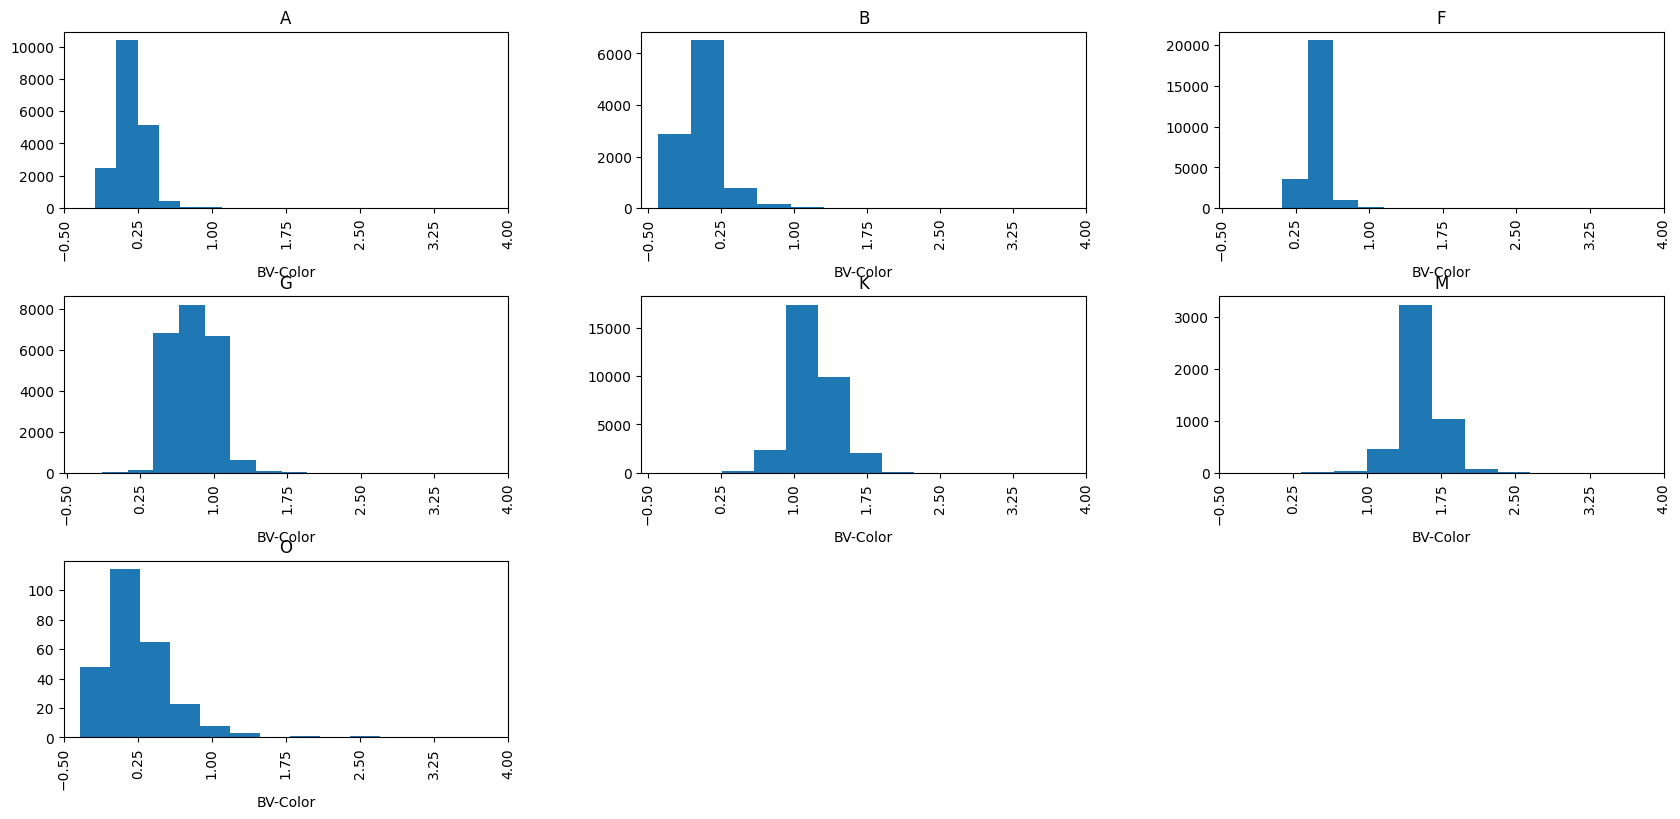

In [52]:
import matplotlib.pyplot as plt

# Histograma BV-Color
ax = df.hist(column="H37", by=df["H76"].str[0], figsize=(20,20), layout=(6,3))

for row in ax:
  for x in row:
    x.set_xlabel("BV-Color")
    x.set_xticks(np.linspace(-0.5, 4, 7))

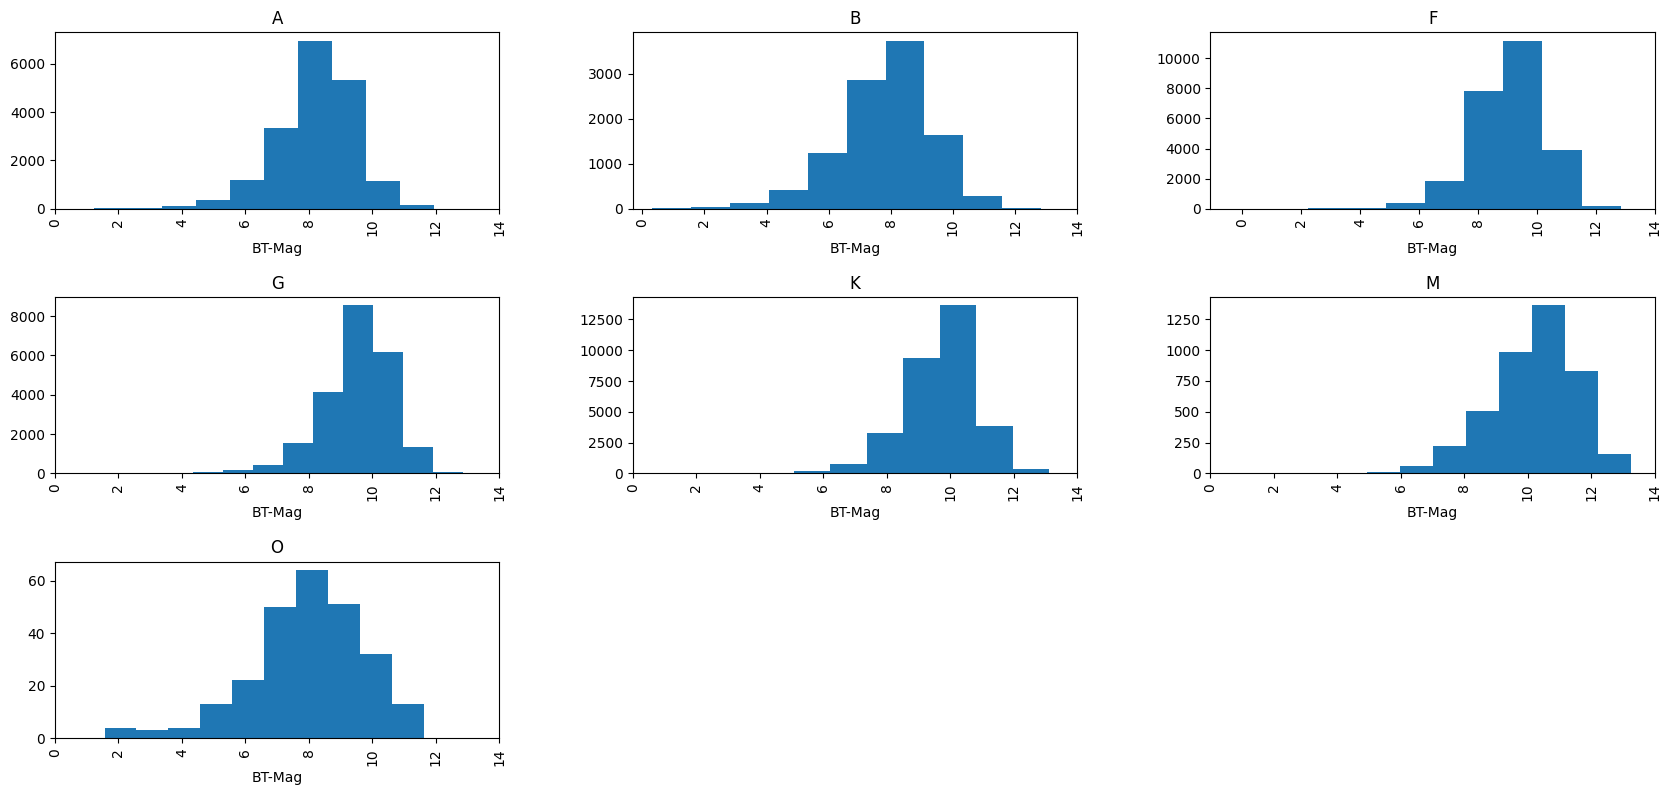

In [48]:
ax = df.hist(column="H32", by=df["H76"].str[0], figsize=(20,20), layout=(6,3))

for row in ax:
  for x in row:
    x.set_xlabel("BT-Mag")
    x.set_xticks(range(0, 15, 2))

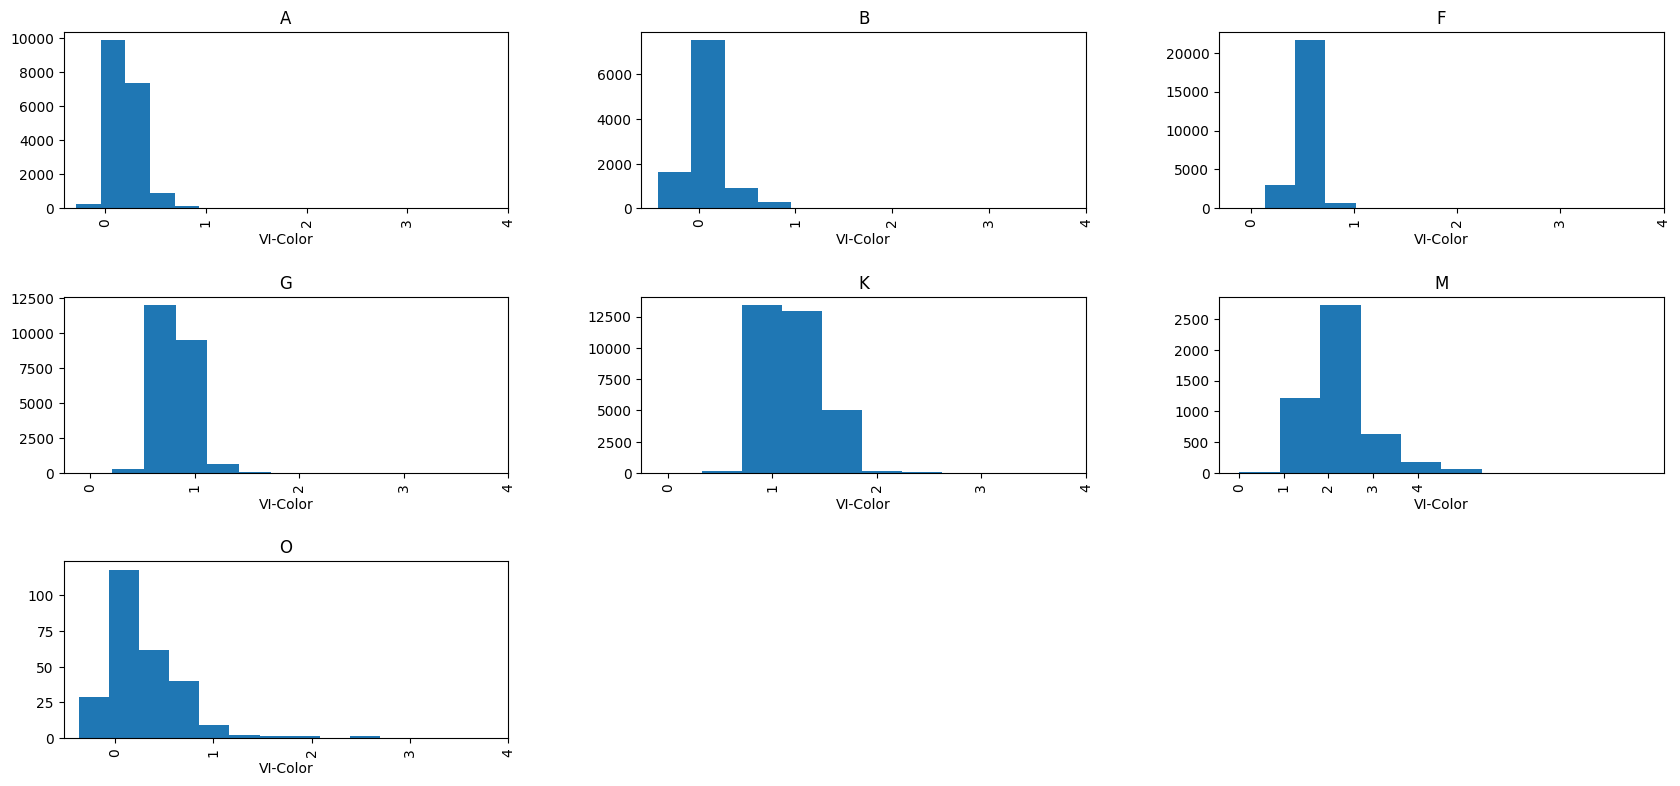

In [64]:
ax = df.hist(column="H40", by=df["H76"].str[0], figsize=(20,20), layout=(6,3))

for row in ax:
  for x in row:
    x.set_xlabel("VI-Color")
    x.set_xticks(np.linspace(0, 4, 5))

# Modelo de machine learning

In [67]:
!pip install tensorflow_decision_forests



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 39.3 MB/s eta 0:00:00


In [68]:
import tensorflow_decision_forests as tfdf